### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [445]:
data = pd.read_csv('data/coupons.csv')

In [446]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [448]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
destination,12684,3,No Urgent Place,6283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passanger,12684,4,Alone,7305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,12684,3,Sunny,10069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,12684.0,NaN,NaN,NaN,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
time,12684,5,6PM,3230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coupon,12684,5,Coffee House,3996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expiration,12684,2,1d,7091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,12684,2,Female,6511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,12684,8,21,2653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maritalStatus,12684,5,Married partner,5100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [449]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12679    False
12680    False
12681    False
12682    False
12683    False
Length: 12684, dtype: bool

In [450]:
data.duplicated().sum()

74

In [451]:
data.drop_duplicates()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [452]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [453]:
data.isna().mean()

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Y                       0.000000
dtype: float64

<AxesSubplot:>

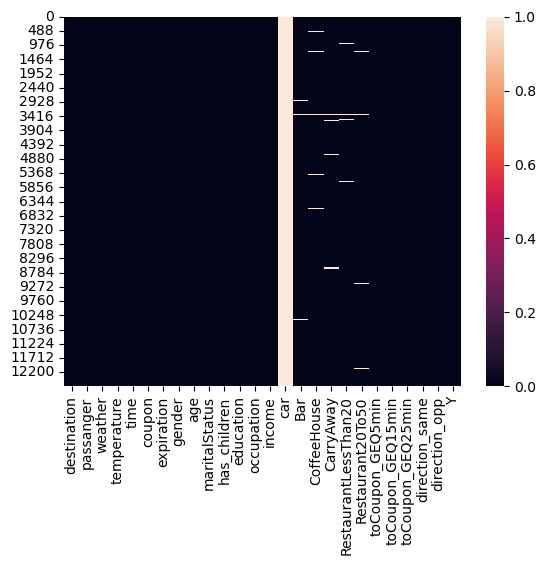

In [454]:
sns.heatmap(data.isna())

In [455]:
data['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [456]:
data = data.drop(columns=['car'])

In [457]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

<AxesSubplot:>

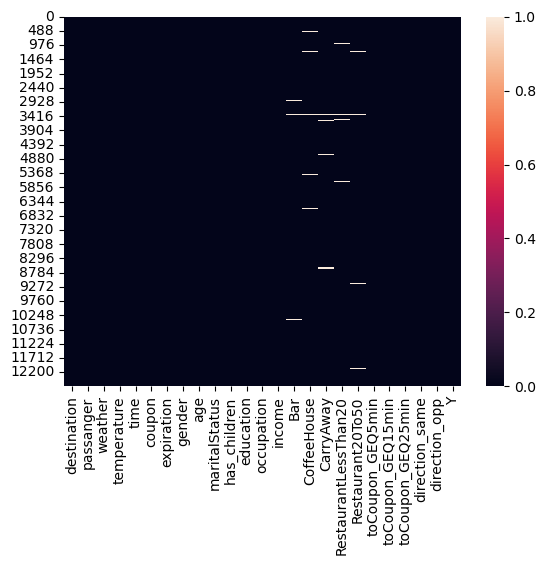

In [458]:
sns.heatmap(data.isna())

In [459]:
data = data.dropna()

<AxesSubplot:>

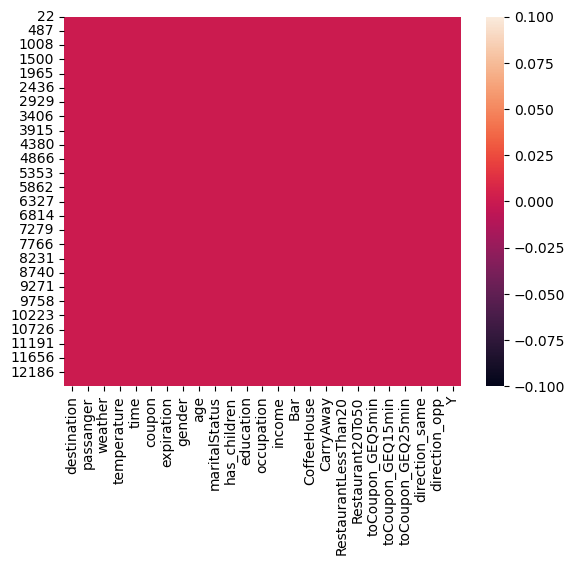

In [460]:
sns.heatmap(data.isna())

4. What proportion of the total observations chose to accept the coupon? 



In [461]:
data.query('Y == 1').shape[0]/data.shape[0]

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:>

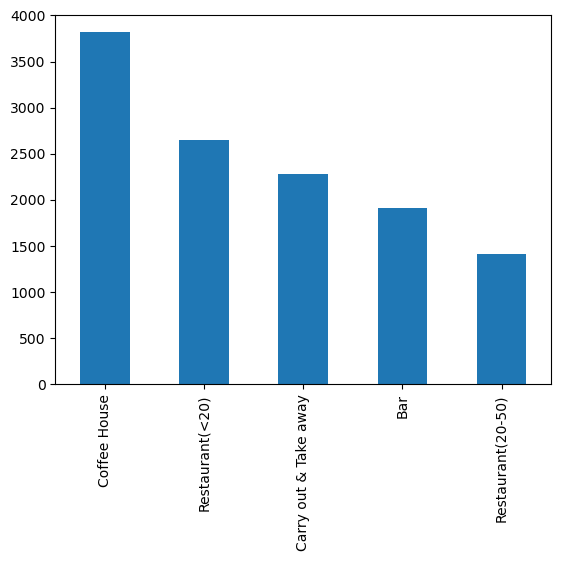

In [615]:
data['coupon'].value_counts().plot(kind= 'bar')

6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

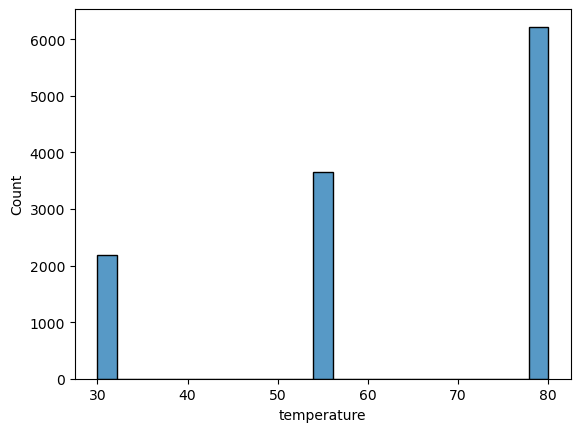

In [752]:
sns.histplot(data=data, x= 'temperature')

In [464]:
data['temperature'].value_counts()

80    6222
55    3662
30    2195
Name: temperature, dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [595]:
data['Bar'].unique()

array(['0', '<1', '1-3', '>8', '4-8'], dtype=object)

In [466]:
dict_bar= {'never': '0', 'less1':'<1', '1~3':'1-3', '4~8': '4-8', 'gt8':'>8'}

In [467]:
data=data.replace({'Bar': dict_bar})

In [597]:
data['Bar'].shape

(12079,)

In [614]:
data[(data['Bar']!='0') & (data['Y']==1)]['coupon'].value_counts()

Coffee House             1143
Restaurant(<20)          1133
Carry out & Take away     980
Bar                       639
Restaurant(20-50)         373
Name: coupon, dtype: int64

In [469]:
df_bar= data.query('coupon == "Bar"')

In [470]:
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [471]:
df_bar.shape

(1913, 25)

### bar coupons were accepted in Percent

In [629]:
df_bar[df_bar['Y']==1].shape[0]/df_bar.shape[0]*100

41.19184526921067

In [473]:
df_bar_1=df_bar[df_bar['Y']==1]

In [474]:
df_bar_1.shape

(788, 25)

In [475]:
df_bar_0=df_bar[df_bar['Y']==0]

In [476]:
df_bar_0.shape

(1125, 25)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [477]:
df_bar["Bar"].unique()

array(['0', '<1', '1-3', '>8', '4-8'], dtype=object)

In [478]:
df_bar[(df_bar['Bar']!='4-8') & (df_bar['Bar']!='>8')].shape[0]

1720

### Acceptance rate in % for People who went to the Bar over 3 time a month

In [631]:
df_bar[(df_bar['Bar']!='4-8') & (df_bar['Bar']!='>8')].shape[0]/df_bar.shape[0]*100

89.91113434396236

### Acceptance rate in % for People who went 3 or less time a month to a Bar

In [632]:
df_bar[(df_bar['Bar']!='0') & (df_bar['Bar']!='<1') & (df_bar['Bar']!='1-3')].shape[0]/df_bar.shape[0]*100

10.088865656037637

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [481]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [482]:
dict_age ={'50plus':'51', 'below21': '20'}

In [483]:
data= data.replace({'age':dict_age})

In [484]:
data['age'].unique()

array(['21', '46', '26', '31', '41', '51', '36', '20'], dtype=object)

In [485]:
data['age'] = data.age.astype('int64')

In [486]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  int64 
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

In [487]:
df_bar['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [488]:
df_bar= df_bar.replace({'age':dict_age})

In [489]:
df_bar['age'].unique()

array(['21', '46', '26', '31', '41', '51', '36', '20'], dtype=object)

In [490]:
df_bar['age'] = df_bar.age.astype('int64')

### Acceptance rate in % for Drivers that are over the age of 25 and goto the bar over 1 time a month

In [593]:
df_bar[(df_bar['Bar']!='0') & (df_bar['Bar']!='<1') & (df_bar['age']>25) &(df_bar['Y']==1)].shape[0]/df_bar.shape[0]*100

14.532148457919497

In [767]:
df_bar['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [492]:
df_bar_mto= df_bar[(df_bar['Bar']!='0') & (df_bar['Bar']!='<1')] 

In [493]:
df_bar['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [637]:
df_bar_mto_nok= df_bar_mto[df_bar_mto['passanger']!= 'Kid(s)']

In [643]:
df_bar_mto_nok.shape

(530, 25)

In [768]:
df_bar_mto_not_kid['occupation'].unique()

array(['Student', 'Healthcare Support', 'Management', 'Unemployed',
       'Sales & Related', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal',
       'Life Physical Social Science', 'Retired',
       'Computer & Mathematical', 'Healthcare Practitioners & Technical',
       'Personal Care & Service', 'Architecture & Engineering',
       'Arts Design Entertainment Sports & Media', 'Protective Service',
       'Business & Financial', 'Food Preparation & Serving Related',
       'Installation Maintenance & Repair', 'Education&Training&Library',
       'Community & Social Services', 'Production Occupations',
       'Transportation & Material Moving',
       'Building & Grounds Cleaning & Maintenance'], dtype=object)

In [769]:
df_bar_mto_nok_n_f= df_bar_mto_nok[(df_bar_mto_nok['occupation']!='Farming Fishing & Forestry') & (df_bar_mto_nok['Y']==1)]

In [770]:
df_bar_mto_nok_n_f.shape

(376, 25)

In [771]:
df_bar_mto_nok_n_f['occupation'].value_counts()

Unemployed                                   57
Student                                      43
Sales & Related                              42
Management                                   35
Office & Administrative Support              30
Computer & Mathematical                      27
Arts Design Entertainment Sports & Media     17
Business & Financial                         15
Protective Service                           12
Food Preparation & Serving Related           11
Healthcare Practitioners & Technical         11
Legal                                        10
Healthcare Support                           10
Education&Training&Library                    8
Production Occupations                        8
Transportation & Material Moving              7
Architecture & Engineering                    6
Construction & Extraction                     6
Personal Care & Service                       6
Installation Maintenance & Repair             5
Community & Social Services             

### Acceptance rate in % for drivers that had non kids passenger and occupation other than Farming, fishing and forestory, in the selected subgroup there was noone with occuation related to Farming , Fishing and Forestory

In [772]:
df_bar_mto_nok_n_f.shape[0]/df_bar.shape[0]*100

19.6549921589127

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [501]:
df_bar_mto_not_kid['maritalStatus'].unique()

array(['Single', 'Unmarried partner', 'Married partner', 'Divorced'],
      dtype=object)

In [502]:
non_widowed =['Married partner', 'Divorced']

### Acceptance rate in percent for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed

In [647]:
df_bar_mto_not_kid.query('maritalStatus in @non_widowed').shape[0]/df_bar.shape[0]*100

7.370622059592264

In [516]:
df_bar_mto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 90 to 12544
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           572 non-null    object
 1   passanger             572 non-null    object
 2   weather               572 non-null    object
 3   temperature           572 non-null    int64 
 4   time                  572 non-null    object
 5   coupon                572 non-null    object
 6   expiration            572 non-null    object
 7   gender                572 non-null    object
 8   age                   572 non-null    int64 
 9   maritalStatus         572 non-null    object
 10  has_children          572 non-null    int64 
 11  education             572 non-null    object
 12  occupation            572 non-null    object
 13  income                572 non-null    object
 14  Bar                   572 non-null    object
 15  CoffeeHouse           572 non-null   

### Acceptance rate in percent for drivers who go to bars more than once a month and are under the age of 30

In [648]:
df_bar_mto[df_bar_mto['age']<30].shape[0]/df_bar.shape[0]*100

17.145844223732357

In [522]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [649]:
df_cheap_rest= data[data['coupon']=='Restaurant(<20)']

In [650]:
df_cheap_rest.shape

(2653, 25)

In [556]:
df_cheap_rest['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [557]:
great_4=['4~8', 'gt8'] 

In [566]:
df_cheap_rest_g4= df_cheap_rest.query('RestaurantLessThan20 in @great_4')

In [563]:
df_cheap_rest['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [586]:
income_l_50k =['$12500 - $24999','$37500 - $49999','$25000 - $37499','Less than $12500']

### Acceptance rate in percent for drivers go to cheap restaurants more than 4 times a month and income is less than 50K

In [651]:
df_cheap_rest_g4.query('income in @income_l_50k and (Y == 1)' ).shape[0]/data.shape[0]*100

2.8975908601705442

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Acceptance rates for the three groups described in Q6
1. go to bars more than once a month, had passengers that were not a kid, and were not widowed = 7.37
2. go to bars more than once a month and are under the age of 30 = 17.14 (Largest)
3. go to cheap restaurants more than 4 times a month and income is less than 50K = 2.89 (Smallest)


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [653]:
df_coffee= data[data['coupon']=='Coffee House']

In [698]:
df_coffee.shape

(3816, 25)

### Fraction of people who accepted Coffee House coupons 

In [697]:
df_coffee[df_coffee['Y']==0].shape[0]/df_coffee.shape[0]

0.5036687631027253

In [668]:
df_coffee.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

<AxesSubplot:xlabel='CoffeeHouse', ylabel='Percent'>

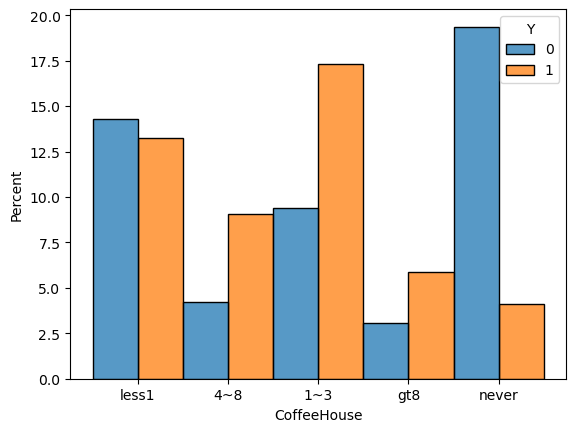

In [677]:
sns.histplot(data=df_coffee,x='CoffeeHouse', hue='Y', multiple='dodge', stat='percent')

### People who drink coffee more freq do tend to accept the coupons for Coffee Houses

### Acceptance Rates of People by Destination

In [715]:
(df_coffee.groupby('destination')[['Y']].value_counts()/df_coffee.shape[0]*100)

destination      Y
Home             0    14.832285
                 1     8.438155
No Urgent Place  1    31.105870
                 0    22.693920
Work             0    12.840671
                 1    10.089099
dtype: float64

<AxesSubplot:xlabel='destination', ylabel='Percent'>

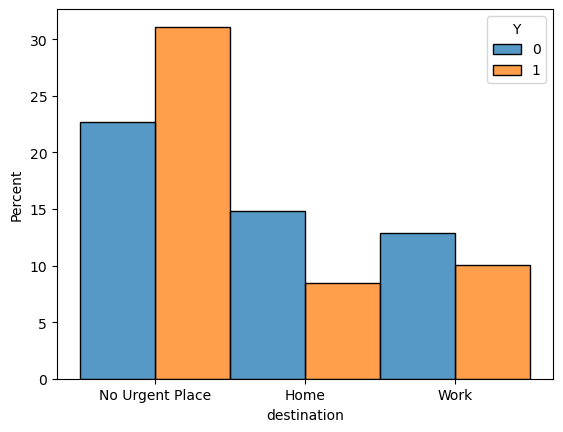

In [699]:
sns.histplot(data=df_coffee, x= 'destination', hue='Y', multiple='dodge', stat='percent')

### Comparision of Fraction of People who accepted coupon Vs who did not as a function of distination they are travelling to. People who's destination was "No Urgent Place" tend to accept coffee house coupons more    

In [700]:
df_coffee_Yis1= df_coffee[df_coffee['Y']==1]

In [716]:
df_coffee_Yis1.shape

(1894, 25)

### Acceptance rate of Drivers by Weather, It appears people are more likely to go to a Coffee house when its Sunny out (~ 43%) and use the coupons  

<AxesSubplot:xlabel='weather', ylabel='Percent'>

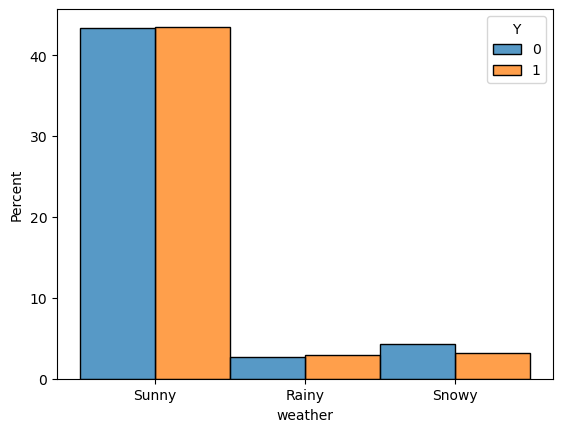

In [713]:
sns.histplot(data=df_coffee,x= 'weather', hue='Y', multiple='dodge', stat='percent')

In [725]:
df_coffee.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

### Acceptance rate of Drivers by Marital Status, Drivers who are Single > Married Partners> Unmarried Partners are Top three groups likely goto Coffee house.

<AxesSubplot:xlabel='Percent', ylabel='maritalStatus'>

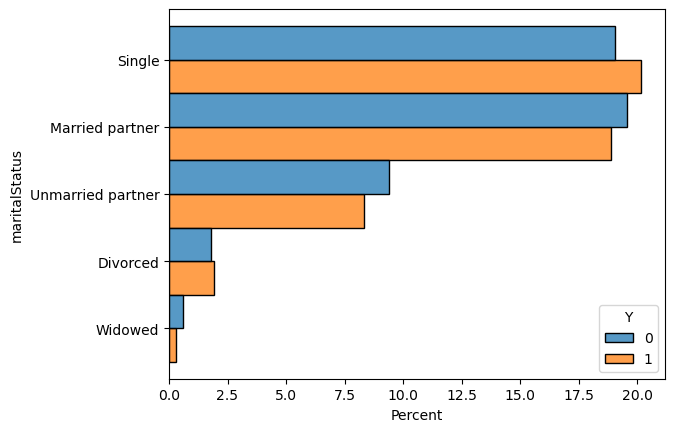

In [738]:
sns.histplot(data=df_coffee, y='maritalStatus',hue="Y", multiple='dodge', stat='percent')

### Acceptance rate for drivers travelling in opp direction is over 60% when they are making a heading to a non Urgent place. This trend is flips to no coupon use when the travel is same to destination.

<AxesSubplot:xlabel='destination', ylabel='Percent'>

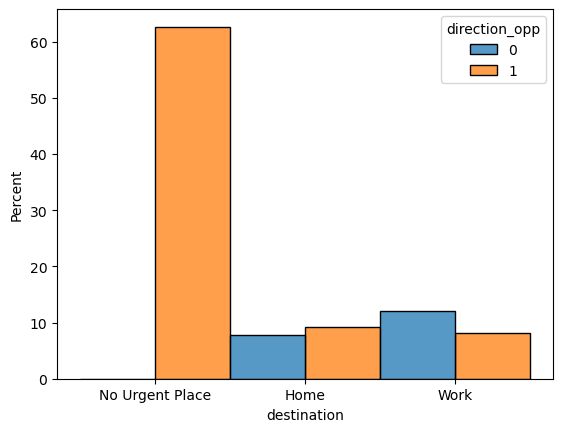

In [737]:
sns.histplot(data=df_coffee_Yis1, x='destination', hue='direction_opp', multiple='dodge', stat='percent')

<AxesSubplot:xlabel='destination', ylabel='Percent'>

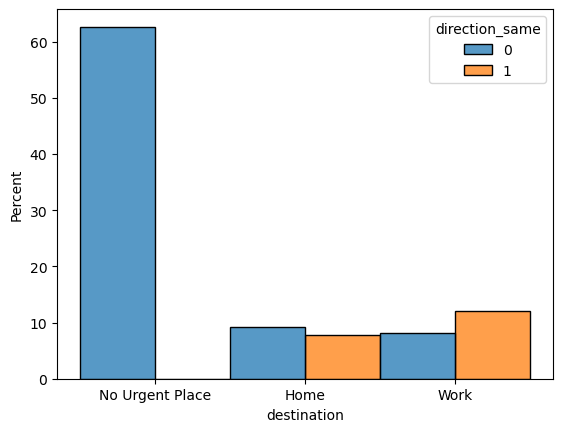

In [745]:
sns.histplot(data=df_coffee_Yis1, x='destination', hue='direction_same', multiple='dodge', stat='percent')

### Acceptance rates od Drivers by Time of the days by gender.acceptance rates are high during morning hours and decays as the day progresses for both genders


<AxesSubplot:xlabel='time', ylabel='Percent'>

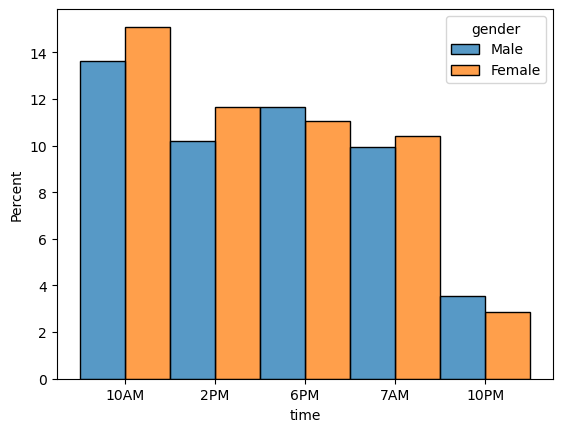

In [773]:
sns.histplot(data=df_coffee_Yis1, x= 'time', hue= 'gender', multiple='dodge', stat= 'percent')

In [774]:
### Acceptance rate of Drivers who are Students and Unemplyed i the highest

<AxesSubplot:xlabel='Percent', ylabel='occupation'>

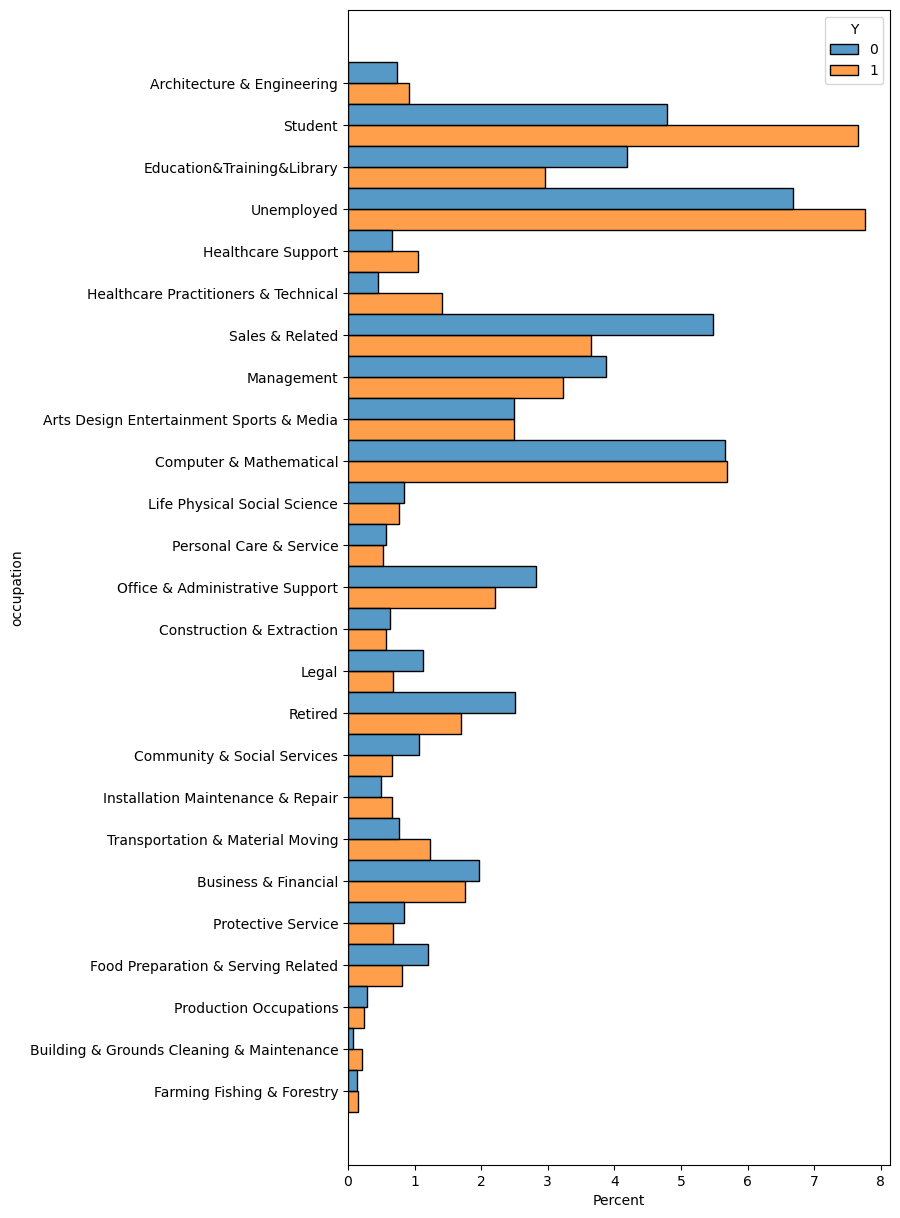

In [765]:
plt.figure(figsize=(7, 15))
sns.histplot(data=df_coffee, y='occupation', hue= 'Y', multiple='dodge', stat='percent')
